### EECS 495: Optimization Techniques for Machine Learning and Deep Learning
Homework 1: Chapter 2 Assignments (2.3, 2.4, 2.9)

Northwestern University - Fall 2018 

### Problem 2.3 - Implement random search to minimize: 

$$ g(w_0, w_1) = \tanh(4w_{0}+4w_1)+\max(0.4w_0^2,1)+1$$

Using the conditions: P = 1000 directions, $\alpha$ = 1, up to 8 steps, and initial point $w^0 = \begin{bmatrix} 2 \\ 2\end{bmatrix}$. 

In [270]:
#Problem 2.3 - Implement random search
import numpy as np

#Lists to store past values 
weights_past = []
evals_past = []

#Variable inits
alpha = 1
w_0 = np.array([2,2])
P = 1000
num_steps = 8

#Define g
def g(w):
    return np.tanh(4*w[0]+4*w[1])+np.max([0.4*w[0]**2,1])+1

#Define a helper function for generating random unit vectors of some length
#Credit to Stack Overflow for this function: https://stackoverflow.com/questions/6283080/random-unit-vector-in-multi-dimensional-space
#I started programming this...but their top solution was so elegant... 
def rand_unit_vec(len):
    vec = [(np.random.rand(1)[0]-0.5)*2 for i in range(0,len)]
    mag = sum(x*x for x in vec)**0.5
    return np.transpose([x/mag for x in vec])

# --- Store initial values ---

#init the weights
w = w_0

#Store the inital values
weights_past.append(w)
evals_past.append(g(w))

# --- Implement random local search ---
for i in range(0, num_steps):
    #init the descent directions for this tep
    dirs = []
    dir_evals = []
    #Compute P descent directions - set the radius of the circle about which we will sample directions to
    # be equal to 1. 
    for j in range(0,P):
        #Generate direction and append
        dirs.append(rand_unit_vec(2))
        
        #Evaluate at generated dir and append
        dir_evals.append(g(w + dirs[j]))
    
    #Select the smallest descent direction
    idx_sm = dir_evals.index(np.min(dir_evals))
    
    #Pull that direction
    dir_sm = dirs[idx_sm]

    #Check if the step + the current pos minimizes the function
    if(g(w + dir_sm) < g(w)): 
        #Take descent step
        w = w + alpha*dir_sm
    
        #Store the step and eval at that step
        weights_past.append(w)
        evals_past.append(g(w))
      #If step doesn't further minimize function, break
    else:
        break
#Print Values         
print('Starting Points:') 
print('W_0:', w_0)
print('g(w_0) = ',g(w_0))
print()
print('Ending Points:')
print('W_final:', weights_past[7])
print('g(W_final) = ',g(weights_past[7]))

Starting Points:
W_0: [2 2]
g(w_0) =  3.5999999999999748

Ending Points:
W_final: [-1.33230856 -3.5026359 ]
g(W_final) =  1.0


$\textbf{Lesson Learned:}$ if $\vec{w}$ is constantly increasing, then it's probably centered about $[0,1)$, bounding $w_1 \times w_2$ to the $1^{st}$ quadrant in a 2D carteasian space. This will mean that $\vec{w}$ can only increase in magnitude and you'll *never* converge. To fix this and save four hours of debugging, the random function should follow $rand \in [-1,1)$ which is found by $2*(rand - 0.5)$.

### Problem 2.4 Using the diminishing steplength

Minimize the famous *Rosenbrock Function*: $g(w_0,w_1) = 100(w_0-w_1^2)^2+(w_0-1)^2$

The function has a global minimum at the point $\textbf{w}^* = \begin{bmatrix} 1 \\ 1\end{bmatrix}$

Implement for all runs using: $P = 1000$, initial point $w_0 = \begin{bmatrix} -2 \\ -2\end{bmatrix}$ and 50 steps.

For the *first run* let $\alpha = 1$ and for the *second run* let $\alpha = 1/k$. 

#### The outputs for this problem are, for each implementation: 
- The cost function history 
- The number of iterations
- The point of convergence
- The vaue at the point of convergence 

#### The output for this problem: 
- Combine cost function history plot
- Contour plot of the cost function with both runs

Minima of g(w) is: 0 located at w = [1,1]


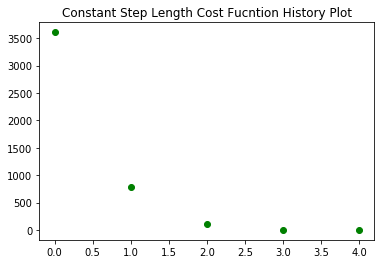

Number of Steps for fixed length:  4
Point of Convergence: [ 0.99477742 -0.99743052]
Value of g() at point of convergence:  2.8089346636195484e-05


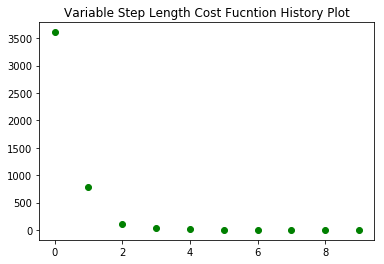

Number of Steps for fixed length:  9
Point of Convergence: [ 0.79728911 -0.91193335]
Value of g() at point of convergence:  0.15896939649972475


In [283]:
import matplotlib
import matplotlib.cm as cm
import matplotlib.pyplot as plt

#Lists to store past values 
weights_past = []
evals_past = []

#Variable inits for all runs 
w_0 = np.array([-2,-2])
P = 1000
num_steps = 100
alpha = 1.0 #For constant step length

#Define g
def g(w):
    return 100*((w[0]-(w[1]**2))**2)+((w[0]-1)**2)


#Storage for constant alpha
g_const_alp = []
w_const_alp = []

#Storage for variable alpha
g_var_alp = []
w_var_alp = []

#different Ws
wfixed = w_0
wvar = w_0

#Store the ICs
w_const_alp.append(wfixed)
g_const_alp.append(g(wfixed))
w_var_alp.append(wvar)
g_var_alp.append(g(wvar))

#Print the minima based on the book's solution
print('Minima of g(w) is:',g([1,1]),'located at w = [1,1]')


# --- Implement random local search for the fixed step length ---
for i in range(0, num_steps):
    #init the descent directions for this tep
    dirs = []
    dir_evals_fixed = []
    #Compute P descent directions - set the radius of the circle about which we will sample directions to
    # be equal to 1. 
    for j in range(0,P):
        #Generate direction and append
        dirs.append(rand_unit_vec(2))
        
        #Evaluate at generated dir with fixed step and append
        dir_evals_fixed.append(g(wfixed + dirs[j]))
    
    #Select the smallest descent direction for fixed
    idx_sm_fixed = dir_evals_fixed.index(np.min(dir_evals_fixed))
    #Pull that direction
    dir_sm_fixed = dirs[idx_sm_fixed]
  
    #Check if the step + the current pos minimizes the function for fixed step
    if(g(wfixed + dir_sm_fixed) < g(wfixed)): 
        #Take descent step
        wfixed = wfixed + alpha*dir_sm_fixed
    
        #Store the step and eval at that step
        w_const_alp.append(wfixed)
        g_const_alp.append(g(wfixed))
    #If step doesn't further minimize function, break
    else:
        break
        
plt.plot(list(range(0,len(g_const_alp),1)), g_const_alp, 'go')
plt.title('Constant Step Length Cost Fucntion History Plot')
plt.show()
print('Number of Steps for fixed length: ',len(g_const_alp)-1)
print('Point of Convergence:',w_const_alp[-1])
print('Value of g() at point of convergence: ',g_const_alp[-1])

# --- Implement random local search for the variable step length ---
for i in range(0, num_steps):
    #init the descent directions for this tep
    dirs = []
    dir_evals_var = []
    #Compute P descent directions - set the radius of the circle about which we will sample directions to
    # be equal to 1. 
    for j in range(0,P):
        #Generate direction and append
        dirs.append(rand_unit_vec(2))
        
        #Evaluate at generated dir with fixed step and append
        dir_evals_var.append(g(wvar + dirs[j]))
    
    #Select the smallest descent direction for fixed
    idx_sm_var = dir_evals_var.index(np.min(dir_evals_var))
    #Pull that direction
    dir_sm_var = dirs[idx_sm_var]

    if(i == 0):
        alpha = 1.0
    else:
        alpha = 1.0/i
     
    #Check if the step + the current pos minimizes the function for variable step length
    if(g(wvar + dir_sm_var) < g(wvar)): 
        #Take descent step
        wvar = wvar + alpha*dir_sm_var
    
        #Store the step and eval at that step
        w_var_alp.append(wvar)
        g_var_alp.append(g(wvar))
   #If step doesn't further minimize function, break
    else:
        break
        
plt.plot(list(range(0,len(g_var_alp),1)), g_var_alp, 'go')
plt.title('Variable Step Length Cost Fucntion History Plot')
plt.show()
print('Number of Steps for fixed length: ',len(g_var_alp)-1)
print('Point of Convergence:',w_var_alp[-1])
print('Value of g() at point of convergence: ',g_var_alp[-1])


# --- Combine Cost Function History Plots --- 
TBD = 1.0

# --- Combine Contour plot with cost function runs atop ---
TBD = 2.0


### Problem 2.9 Coordinate search vs. coordinate descent
Implement the coordinate search and coordinate descent algorithms and repeat the experiment discussed in Example 0.6.

#### Example 0.6:
Compare the efficacy of coordinate search and coordinate descent on the function: 

$$ g(w_0,w_1) = 0.26(w_0^2+w_1^2)-0.48w_0w_1$$
#### For this problem the following parameters are used for both algorithms:
- $w_0 = \begin{bmatrix} 3 \\ 4\end{bmatrix}$ (as indicated in Figure 0.13)
- Total steps = 40 (as indicated on Piazza)
- $\alpha = 1/k$ (diminishing step length)

#### The outputs of this problem, for each function:
- Number of evaluations 
- Point of convergence 
- Cost function history plot 
- Contour plot of function minimizer





